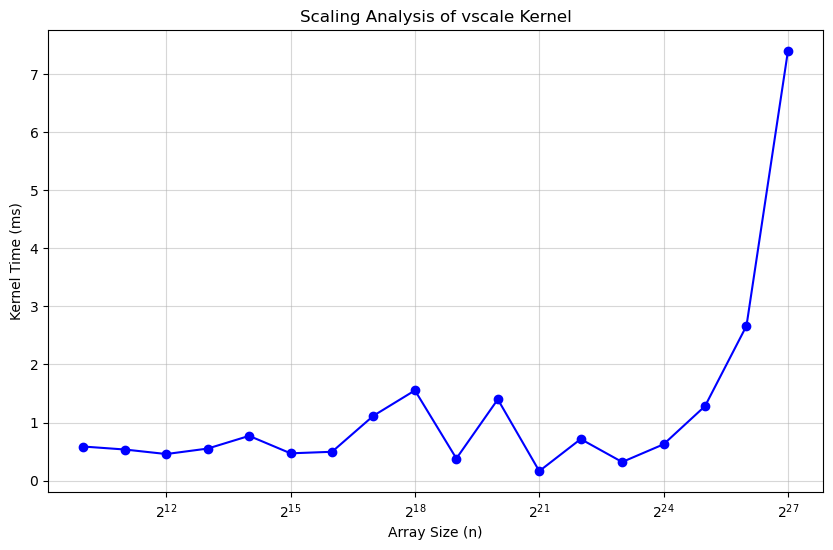

In [6]:
import matplotlib.pyplot as plt
import re
import os

# Directory where the timing files are stored
timing_dir = ""

# SLURM array IDs used
task_ids = range(10, 30)  # inclusive of 10-29

n_values = []
times = []

for task_id in task_ids:
    filename = os.path.join(timing_dir, f"timing_{task_id}.txt")
    with open(filename, "r") as f:
        content = f.read()
        # Extract the number after "Kernel time (ms):"
        match = re.search(r"Kernel time \(ms\):\s*([\d.e+-]+)", content)
        if match:
            n = 2**task_id
            n_values.append(n)
            times.append(float(match.group(1)))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker="o", linestyle="-", color="b")
plt.xscale("log", base=2)
# plt.yscale("log")
plt.xlabel("Array Size (n)")
plt.ylabel("Kernel Time (ms)")
plt.title("Scaling Analysis of vscale Kernel")
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.savefig("task3_scaling.pdf")